<a href="https://colab.research.google.com/github/shyamsundar-v/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

Connecting to Drive to Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
tel_df = pd.read_csv('/content/drive/MyDrive/EDA_Telecom_Churn/Data/Telecom Churn.csv')
print(tel_df.shape)
tel_df.head()

(3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From the above we can see that there are no features with the null values.

In [5]:
len(tel_df['State'].value_counts())

51

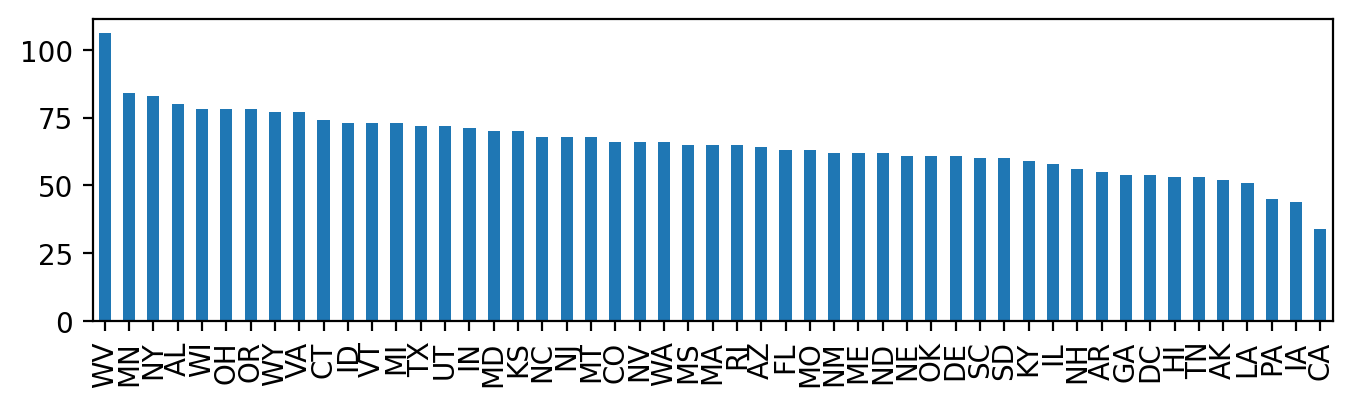

In [6]:
plt.figure(figsize=(8,2),dpi=200)
tel_df['State'].value_counts().sort_values(ascending=False).plot(kind='bar')


In [7]:
tel_df['Churn']=tel_df['Churn'].apply(lambda x : 1 if x==True else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


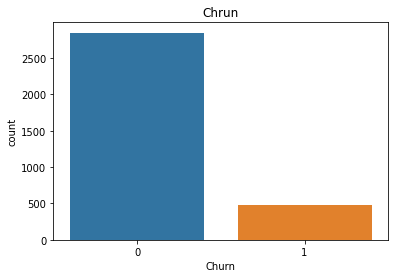

In [8]:
sns.countplot(tel_df['Churn'])
plt.title('Chrun')
plt.show()

From the above plot we can say thatwe have less number of subscribers have cancelled the subscription compared to the total count which is around 16%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


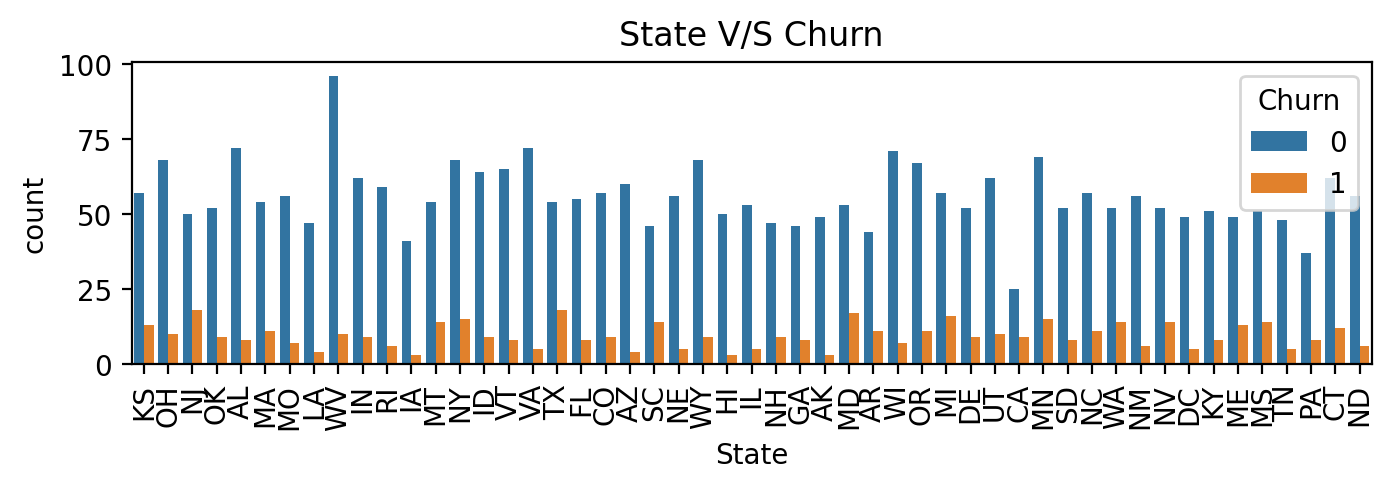

In [9]:
plt.figure(figsize=(8,2),dpi=200)
sns.countplot(tel_df['State'],hue=tel_df['Churn'])
plt.title('State V/S Churn')
plt.xticks(Rotation=90)
plt.show()

We can conclude from the above plot that NJ and TX states have the subscribers with highest cancellation of subscription and IA with the lowest.

Also the state WV has the highest number of subscribers who have withhold the subscription.

In [10]:
tel_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

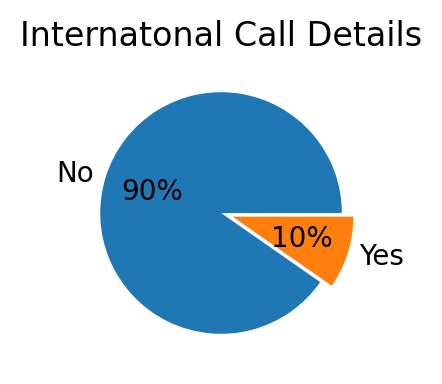

In [11]:
plt.figure(figsize=(5,2),dpi=200)
plt.pie(tel_df['International plan'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',explode=[0,0.1])
plt.title('Internatonal Call Details')
plt.show()

From the above we can see that 90% of the states have No international plan facility and states with just 10% have International plan facility

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


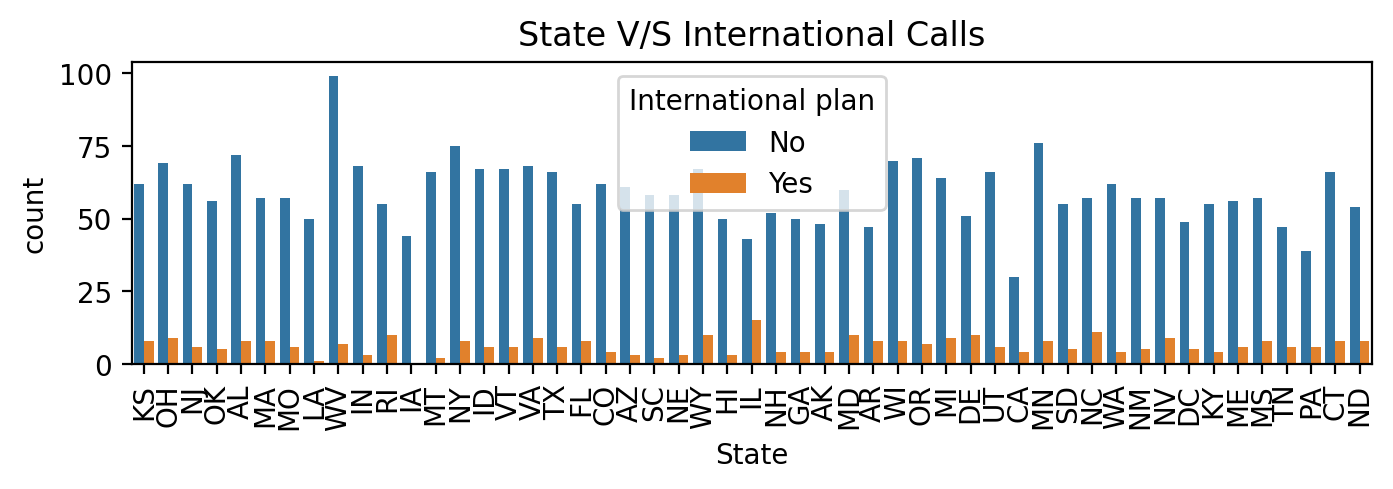

In [12]:

plt.figure(figsize=(8,2),dpi=200)
sns.countplot(tel_df['State'],hue=tel_df['International plan'])
plt.title('State V/S International Calls')
plt.xticks(Rotation=90)
plt.show()

Analysis of International calls wrt State:-


1.   Highest Iternational Calls -IL( Even though not a hight subscribed state)
2.   Lowest/No Iternational Calls -IA followed by LA



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


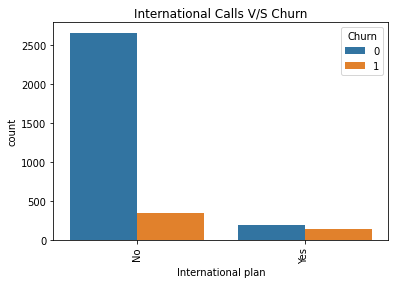

In [13]:
sns.countplot(tel_df['International plan'],hue=tel_df['Churn'])
plt.title('International Calls V/S Churn')
plt.xticks(Rotation=90)
plt.show()

For the state which has International plan Chrun rate is almost similar and for the states with no internation plan subscription withdrawl from the customer is low as 16% which is same as total churan rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


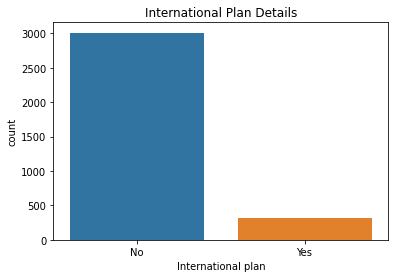

In [14]:

sns.countplot(tel_df['International plan'])
plt.title('International Plan Details')
plt.show();



In [15]:
print(f"Percentage of International plans {tel_df['International plan'].value_counts()['Yes']/tel_df.shape[0]*100}")
print(f"Percentage of Non International plans {tel_df['International plan'].value_counts()['No']/tel_df.shape[0]*100}")


Percentage of International plans 9.69096909690969
Percentage of Non International plans 90.3090309030903


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Percentage of Voice mail plans 27.662766276627664
Percentage of Non Voice mail plans 72.33723372337234




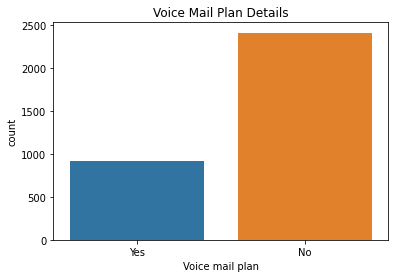

In [16]:
print(f"Percentage of Voice mail plans {tel_df['Voice mail plan'].value_counts()['Yes']/tel_df.shape[0]*100}")
print(f"Percentage of Non Voice mail plans {tel_df['Voice mail plan'].value_counts()['No']/tel_df.shape[0]*100}")
print()
print()
sns.countplot(tel_df['Voice mail plan'])
plt.title('Voice Mail Plan Details')
plt.show();

From the above plot we can say that there are around 28% of the subscribers who has Voice mails plan and the rest 72% dont have Voice mail plans

In [17]:
tel_df['International plan']=tel_df['International plan'].apply(lambda x : 1 if x=='Yes' else 0)
tel_df['Voice mail plan']=tel_df['Voice mail plan'].apply(lambda x : 1 if x=='Yes' else 0)

In [18]:
tel_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


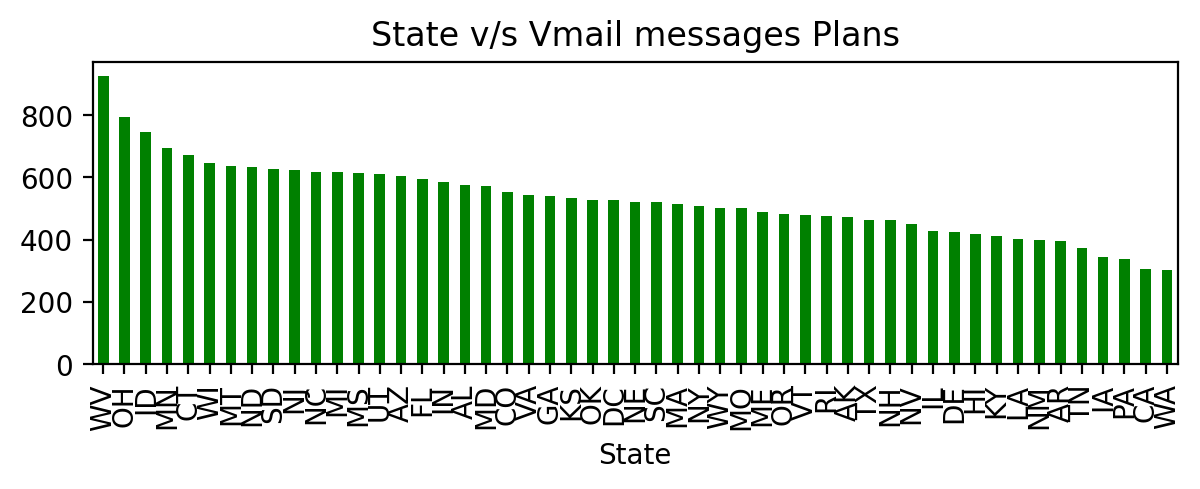

In [19]:
plt.figure(figsize=(7,2),dpi=200)
tel_df.groupby(['State'])['Number vmail messages'].sum().sort_values(ascending=False).plot(kind='bar',color = ['green'])
plt.title('State v/s Vmail messages Plans')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


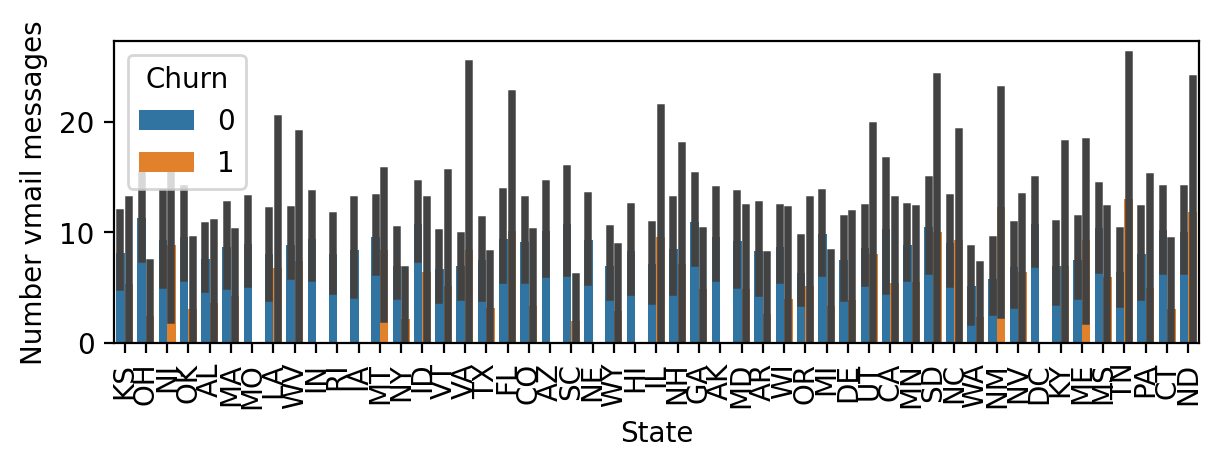

In [20]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Number vmail messages'],hue=tel_df['Churn'])
plt.xticks(rotation=90)
plt.show();

From the above plot we can say that the state with the highest number of subscribers WV has high number of vmail plans and the state with lowest of vmail plans is with WA followed precceded by the state CA with the lowest number of subscribers.

From the 2nd plot we can say thatthere are very few states in terms of Vmail messages got churned of count 16 out of 51 states. So need some modification in the Vmail messages plan in those 16 states. 

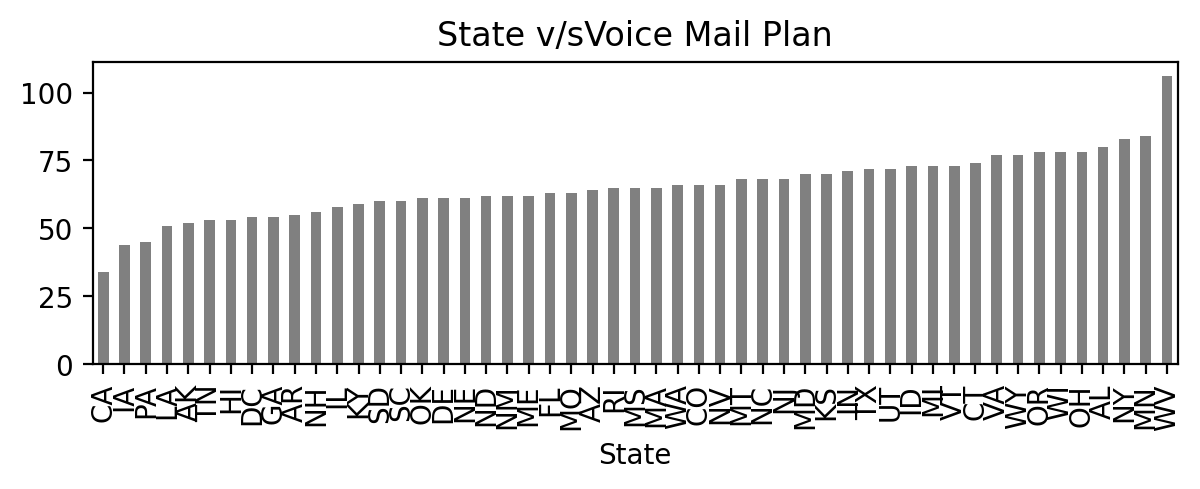

In [21]:
plt.figure(figsize=(7,2),dpi=200)
tel_df.groupby(['State'])['Voice mail plan'].count().sort_values(ascending=True).plot(kind='bar',color = ['grey'])
plt.title('State v/sVoice Mail Plan')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


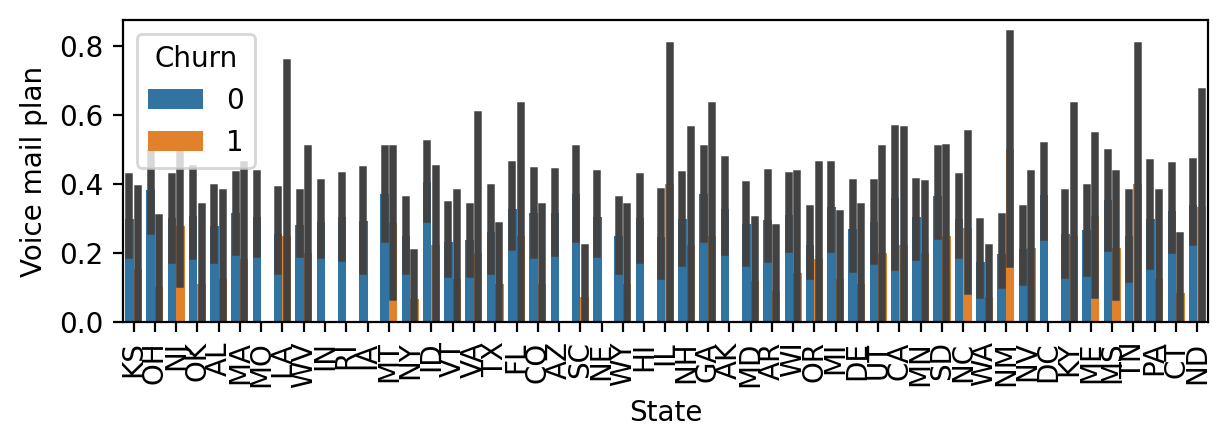

In [22]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Voice mail plan'],hue=tel_df['Churn'])
plt.xticks(rotation=90)
plt.show();

From the above plot we can say that the state with the highest number of subscribers WV has high number of vmail plans and the state with lowest of vmail plans is with CA is also the state  with the lowest number of subscribers.

From the 2nd plot we can say that there are very few states in terms of voice maik plan got churned of count 16 out of 51 states. So need some modification in the Vmail messages plan in those 16 states.

The state which got churned in terms of Vmessages plan has a major possibility of getting churned in case of voice mail plan as well.

So needed a major change in these 2 plans to save hold the customer subscription

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


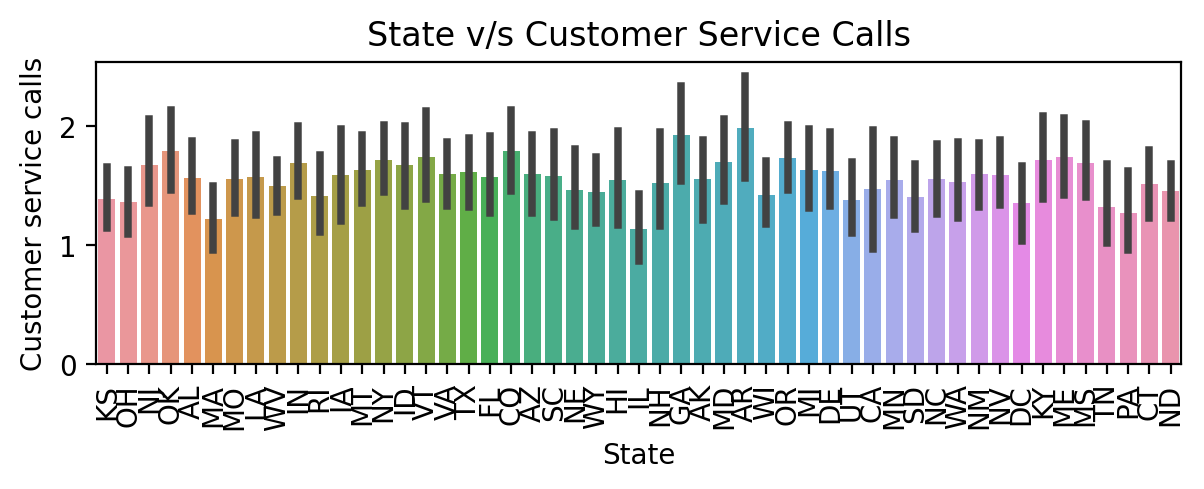

In [23]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Customer service calls'])
plt.title('State v/s Customer Service Calls')
plt.xticks(rotation=90)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


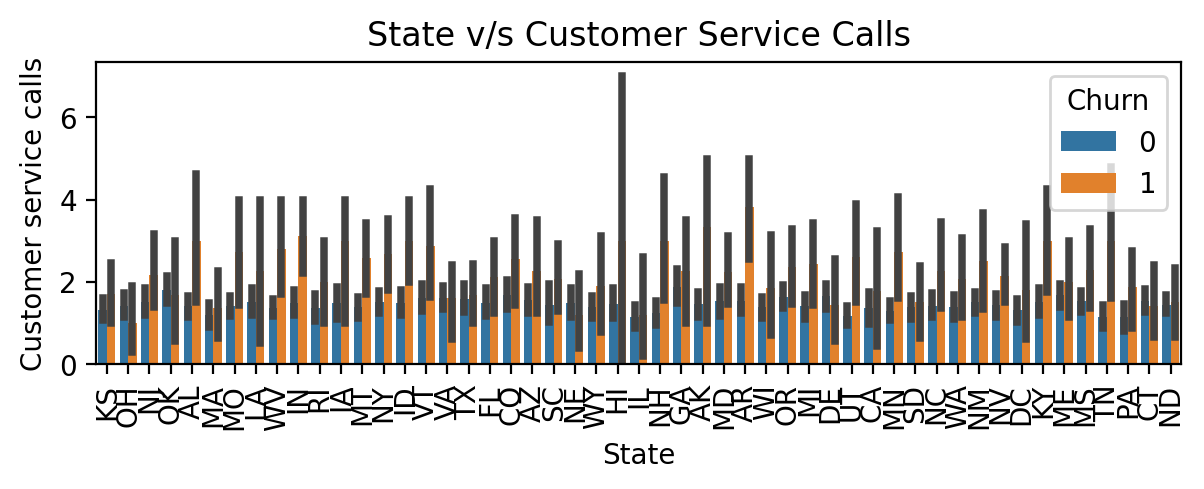

In [24]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Customer service calls'],hue=tel_df['Churn'])
plt.title('State v/s Customer Service Calls')
plt.xticks(rotation=90)
plt.show();

From the 1st plot we can sya that the state AR has the highest customer service calls and the state IL has the lowest customer service calls

But from the 2nd plot, we can say that higher the state with customer service calls higher the churn rate and vice versa 

Also irrespective of the count of no of customer service calls for any state, the number of subscribers being held without dropping off is almost same in every state.